<a href="https://colab.research.google.com/github/deniz2104/Diabetes-Prediciton/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importarea librariilor necesare

In [174]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

## Importarea setului de date si afisarea primelor randuri din setul de date pentru a observa caracteristici ale diferitelor coloane.
### Dupa cum se poate observa,setul de date contine valori egale cu 0 in anumite coloane de interes pentru problema noastra de clasficare.


In [69]:
diabetes_dataset=pd.read_csv('diabetes.csv')
print(diabetes_dataset.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [70]:
diabetes_dataset.shape

(768, 9)

## Scurta descriere a setului de date

In [71]:
diabetes_dataset.describe().T

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Analizam daca exista valori nule in setul nostru de date

In [73]:
diabetes_dataset.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


## Analizam cate outcome-uri pozitive avem

<Axes: xlabel='Outcome', ylabel='count'>

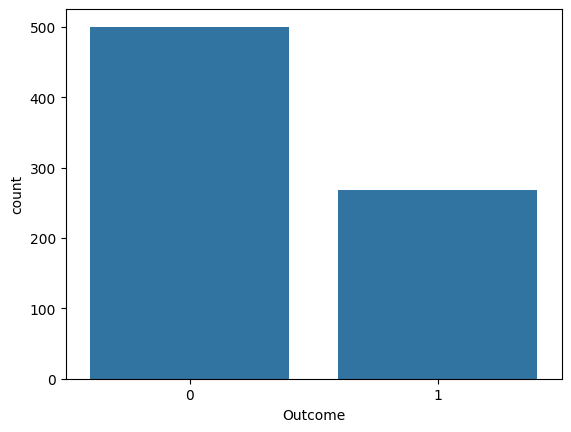

In [74]:
sns.countplot(x = 'Outcome',data = diabetes_dataset)

## Afisam matricea de corelatie

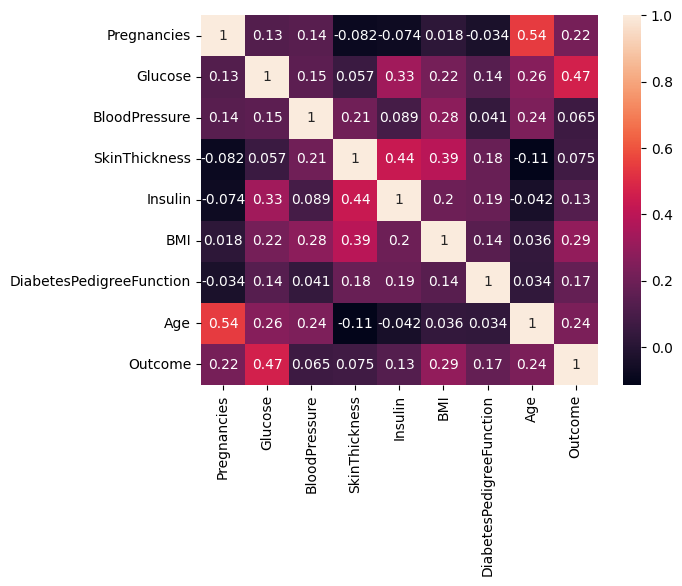

In [76]:
sns.heatmap(diabetes_dataset.corr(), annot = True)
plt.show()

## Observand care date sunt egale cu 0 in setul de date trecut,am facut o copie si pentru inceput am inlocuit valorile de 0 cu Nan pentru a nu deteriora media in momentul inlocuirii.

In [133]:
dataset_new=diabetes_dataset
dataset_new[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]]=dataset_new[["Glucose","BloodPressure","SkinThickness","Insulin","BMI"]].replace(0,np.NaN)
print(dataset_new.isnull().sum)

<bound method DataFrame.sum of      Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0          False    False          False          False    False  False   
1          False    False          False          False    False  False   
2          False    False          False          False    False  False   
3          False    False          False          False    False  False   
4          False    False          False          False    False  False   
..           ...      ...            ...            ...      ...    ...   
763        False    False          False          False    False  False   
764        False    False          False          False    False  False   
765        False    False          False          False    False  False   
766        False    False          False          False    False  False   
767        False    False          False          False    False  False   

     DiabetesPedigreeFunction    Age  Outcome  
0                   

## Inlocuiesc coloanele din setul de date respectiv cu valorile medii ale coloanei.

In [134]:
dataset_new.fillna(dataset_new["Glucose"].mean(), inplace = True)
dataset_new.fillna(dataset_new["BloodPressure"].mean(), inplace = True)
dataset_new.fillna(dataset_new["SkinThickness"].mean(), inplace = True)
dataset_new.fillna(dataset_new["Insulin"].mean(), inplace = True)
dataset_new.fillna(dataset_new["BMI"].mean(), inplace = True)

## Afisez informatii despre noul set de date

In [135]:
dataset_new.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.000000,6.000000,17.00
Glucose,768.0,121.686763,30.435949,44.000,99.75000,117.000000,140.250000,199.00
BloodPressure,768.0,72.405184,12.096346,24.000,64.00000,72.202592,80.000000,122.00
SkinThickness,768.0,29.153420,8.790942,7.000,25.00000,29.153420,32.000000,99.00
Insulin,768.0,155.548223,85.021108,14.000,121.50000,155.548223,155.548223,846.00
BMI,768.0,32.457464,6.875151,18.200,27.50000,32.400000,36.600000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.372500,0.626250,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.000000,41.000000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.000000,1.000000,1.00


## Avand in vedere ca sunt date care sunt mult prea mici sau mult prea mari am decis sa le normalizez in intervalul (0,1),avand in vedere ca apelez LogisticRegression care este sensibil la diferente foarte mari intre elemente.

In [136]:
sc = MinMaxScaler(feature_range = (0, 1))
dataset_scaled = sc.fit_transform(dataset_new)
dataset = pd.DataFrame(dataset_scaled)

## Transform setul de date in matricea folosita pentru clasificare,iar outcome-ul este practic un label definit prin vectorul Y

In [137]:
X = dataset.iloc[:, [1, 4, 5, 7]].values
Y = dataset.iloc[:, 8].values

## Aplicarea scalarii pentru a avea o distribuire a datelor standardizata foarte utila pentru metodele folosite pentru clasificare

In [138]:
scaler=StandardScaler()
scaler.fit(X)
standardized_data=scaler.transform(X)
X=standardized_data

## Aplicarea PCA asupra matricii ca sa vededm in functie de cate elemente retine cea mai multa informatie

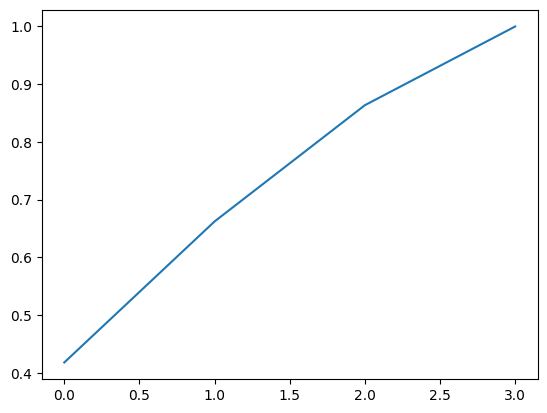

In [139]:
pca = PCA(); pcX = pca.fit_transform(X)
ev=pca.explained_variance_ratio_ ; cumulativeVar = np.cumsum(ev)
plt.plot(cumulativeVar)

## Functie de aplicare a PCA care va fi folosita in implementarea metodelor

In [140]:
def apply_pca(X_train,X_test,n_components):
  pca = PCA(n_components=n_components)
  pca.fit(X_train)
  X_train_pca = pca.fit_transform(X_train)
  X_test_pca = pca.transform(X_test)
  return X_train_pca,X_test_pca

## Metoda SVM 
### Descrierea metodei:
#### SVM reprezinta un set de metode supervizate folosit pentru clasificare,regresie sau detectia anomaliilor.
#### In cadrul metodei SVM principiul de baza reprezinta gasirea unui hiperplan optim in care sa se maximizeze marginea dintre clasele de date.
### Avantaje:
#### -Bun pentru seturi de date reduse
#### -Bun in spatii dimensionale mari
#### -Atunci cand numarul dimensiunilor este mai mare decat numarul de caracteristici
#### -Versatil:in functie de kernel se pot clasifica divese tipuri de seturi de date

### Dezavantaje:
#### -Dacă numărul de caracteristici este mult mai mare decât numărul de exemple, se va evita supraînvățărea prin alegerea funcțiilor kernel și a termenului de regularizare.
#### -SVM este mult mai potrivit pentru probleme de clasificare binare,rezulatate mai slabe in clasificarea multiclasa

In [141]:
def train_and_evaluate_svm(X_train, Y_train, X_test, Y_test,C=1.0,kernel='rbf'):
  clf=svm.SVC(C=C,kernel=kernel)
  clf.fit(X_train,Y_train)
  y_pred=clf.predict(X_test)
  accuracy = accuracy_score(y_pred, Y_test)
  return y_pred,accuracy

## Metoda KNN
### Descrierea metodei:
#### KNN este un algoritm folosit in metodele supervizate care se bazeaza pe proximitate pentru a face o predictie asupra imprejurarii unui punct invidual din setul de data.Se foloseste cel mai mult in problemele de clasificare,premiza finnd ca punctele similar pot fi gasite unele langa altele.Se calculeaza o distanta(o distanta generalizata pentru parametrul p).Se calculeaza distantele,se vor sorta si se va lua un vot majoritar,iar acela va fi outputul.
### Avantaje:
#### - Usor de implementat
#### - Se adapteaza usor daca sunt adauga noi sample-uri de atrenare
#### - Putini hyperparametrii,necesita numarul de vecini si distanta care se aplica
### Dezavantaje:
#### - Nu este scalabil
#### - Nu se descurca cu date de dimensiuni mari
#### - Din cauza factorului mentionat mai devreme este favorizat pentru overfitting

In [158]:
def train_and_evaluate_knn(X_train, Y_train, X_test, Y_test,n_neighbors=5):
  knn_model = KNeighborsClassifier(n_neighbors = n_neighbors)
  knn_model.fit(X_train, Y_train)
  prediction = knn_model.predict(X_test)
  accuracy=accuracy_score(prediction, Y_test)
  return prediction,accuracy

## Gaussian Naive Bayes
### Descrierea metodei:

### Avantaje:

### Dezavantaje:

In [159]:
def train_and_evaluate_gnb(X_train, Y_train, X_test, Y_test):
  gbb=GaussianNB()
  gbb.fit(X_train,Y_train)
  y_pred=gbb.predict(X_test)
  accuracy = accuracy_score(y_pred, Y_test)
  return y_pred,accuracy

## Metoda RF
### Random Forest este un algoritm de învățare automată bazat pe tehnici de ansamblu, utilizat pentru probleme de clasificare și regresie. Aceasta funcționează prin construirea unui număr mare de arbori de decizie independenți în timpul antrenării și combinarea predicțiilor acestora pentru a obține un rezultat final robust și precis.
### Avantaje:
#### -Robust:se reduce riscut de overfitting datorita utilizarii mai multor arbori de decizie,functioneaza bine pe seturi de date mari
#### -Versatil
#### -Scalabil
#### -Rezistent la zgomot
### Dezavantaje:
#### -Complexitate ridicata datorita faptului ca este bazat pe arbori de decizie
#### -Sensibil la hiperparametri

In [165]:
def train_and_evaluate_random_forest(X_train, Y_train, X_test, Y_test):
  rf_model = RandomForestClassifier()
  rf_model.fit(X_train, Y_train)
  prediction = rf_model.predict(X_test)
  accuracy=accuracy_score(prediction, Y_test)
  return prediction,accuracy

## Plotarea matricii de confuzie sunt forma de heatmap

In [142]:
def plot_confusion_matrix(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(10, 8))
  sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

## Aplicarea SVM fara PCA

In [143]:
def svm_without_pca(X,y,C,kernel,dataset):
  X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,stratify = dataset['Outcome'])
  y_pred,accuracy=train_and_evaluate_svm(X_train,Y_train,X_test,Y_test,C,kernel)
  print(f"Accuracy: {accuracy}")
  print(classification_report(Y_test,y_pred))
  plot_confusion_matrix(Y_test,y_pred)

## Aplicarea SVM cu PCA

In [144]:
def svm_with_pca(X,y,C,kernel,n_components,dataset):
  X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,stratify=dataset['Outcome'])
  pcX_train, pcX_test = apply_pca(X_train, X_test, n_components)
  y_pred, accuracy = train_and_evaluate_svm(pcX_train, Y_train, pcX_test, Y_test, C, kernel)
  print(f"Accuracy: {accuracy}")
  print(classification_report(Y_test,y_pred))
  plot_confusion_matrix(Y_test,y_pred)

## KNN fara PCA
### Pentru metoda KNN am abordat implementarea putin diferit.Am folosit o bucla for,iar pentru fiecare numar de vecini am calculat accuratetea pentru a vedea ce numar de vecini este cel mai potrivit

In [160]:
def knn_without_pca(X,y,dataset):
  X_axis = list(range(1, 31))
  acc =[]
  x = range(1,31)

  for i in list(range(1, 31)):
    X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,stratify=dataset['Outcome'])
    prediction,accuracy=train_and_evaluate_knn(X_train,Y_train,X_test,Y_test,i)
    acc.append(accuracy)
  plt.plot(X_axis, acc)
  plt.xticks(x)
  plt.title("Finding best value for n_estimators")
  plt.xlabel("n_estimators")
  plt.ylabel("Accuracy")
  plt.grid()
  plt.show()
  print('Highest value: ',max(acc))
  print(classification_report(Y_test,prediction))
  plot_confusion_matrix(Y_test,prediction)

## KNN cu PCA

In [161]:
def knn_with_pca(X,y,n_components,dataset):
  X_axis = list(range(1, 31))
  acc =[]
  x = range(1,31)

  for i in list(range(1, 31)):
    X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,stratify=dataset['Outcome'])
    pcX_train, pcX_test = apply_pca(X_train, X_test, n_components)
    prediction, accuracy = train_and_evaluate_knn(pcX_train, Y_train, pcX_test, Y_test,i)
    acc.append(accuracy)
  plt.plot(X_axis, acc)
  plt.xticks(x)
  plt.title("Finding best value for n_estimators")
  plt.xlabel("n_estimators")
  plt.ylabel("Accuracy")
  plt.grid()
  plt.show()
  print('Highest value: ',max(acc))
  print(classification_report(Y_test,prediction))
  plot_confusion_matrix(Y_test,prediction)

## GNB fara PCA

In [162]:
def gnb_without_pca(X,y,dataset):
  X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,stratify=dataset['Outcome'])
  y_pred,accuracy = train_and_evaluate_gnb(X_train,Y_train,X_test,Y_test)
  print(f"Accuracy: {accuracy}")
  print(classification_report(Y_test,y_pred))
  plot_confusion_matrix(Y_test,y_pred)

## GNB cu PCA

In [163]:
def gnb_with_pca(X,y,n_components,dataset):
  X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,stratify=dataset['Outcome'])
  pcX_train, pcX_test = apply_pca(X_train, X_test, n_components)
  y_pred, accuracy = train_and_evaluate_gnb(pcX_train, Y_train, pcX_test, Y_test)
  print(f"Accuracy: {accuracy}")
  print(classification_report(Y_test,y_pred))
  plot_confusion_matrix(Y_test,y_pred)

## RF fara PCA
### Folosescu o abordare asemanatoare ca la KNN pentru a avea randamentul cel mai bun pentru KNN

In [169]:
def random_forest_without_pca(X,y,dataset):
  X_axis = list(range(1, 31))
  acc =[]
  x = range(1,31)

  for i in list(range(1, 31)):
    X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,stratify=dataset['Outcome'])
    y_pred,accuracy = train_and_evaluate_random_forest(X_train,Y_train,X_test,Y_test)
    acc.append(accuracy)
  plt.plot(X_axis, acc)
  plt.xticks(x)
  plt.title("Finding best value for n_estimators")
  plt.xlabel("n_estimators")
  plt.ylabel("Accuracy")
  plt.grid()
  plt.show()
  print('Highest value: ',max(acc))
  print(classification_report(Y_test,y_pred))
  plot_confusion_matrix(Y_test,y_pred)

## RF cu PCA

In [170]:
def random_forest_with_pca(X,y,n_components,dataset):
  X_axis = list(range(1, 31))
  acc =[]
  x = range(1,31)

  for i in list(range(1, 31)):
    X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,stratify=dataset['Outcome'])
    pcX_train, pcX_test = apply_pca(X_train, X_test, n_components)
    y_pred, accuracy = train_and_evaluate_random_forest(pcX_train, Y_train, pcX_test, Y_test)
    acc.append(accuracy)
  plt.plot(X_axis, acc)
  plt.xticks(x)
  plt.title("Finding best value for n_estimators")
  plt.xlabel("n_estimators")
  plt.ylabel("Accuracy")
  plt.grid()
  plt.show()
  print('Highest value: ',max(acc))
  print(classification_report(Y_test,y_pred))
  plot_confusion_matrix(Y_test,y_pred)

## Logistic Regression

In [172]:
def logistic_regression(X,y,dataset):
  X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2,stratify=dataset['Outcome'])
  model=LogisticRegression()
  model.fit(X_train,Y_train)
  y_pred=model.predict(X_test)
  accuracy=accuracy_score(y_pred,Y_test)
  print(f"Accuracy: {accuracy}")
  print(classification_report(Y_test,y_pred))
  plot_confusion_matrix(Y_test,y_pred)

## Apelarea tuturor functiilor in main

Accuracy: 0.7662337662337663
              precision    recall  f1-score   support

         0.0       0.77      0.91      0.83       100
         1.0       0.75      0.50      0.60        54

    accuracy                           0.77       154
   macro avg       0.76      0.71      0.72       154
weighted avg       0.76      0.77      0.75       154



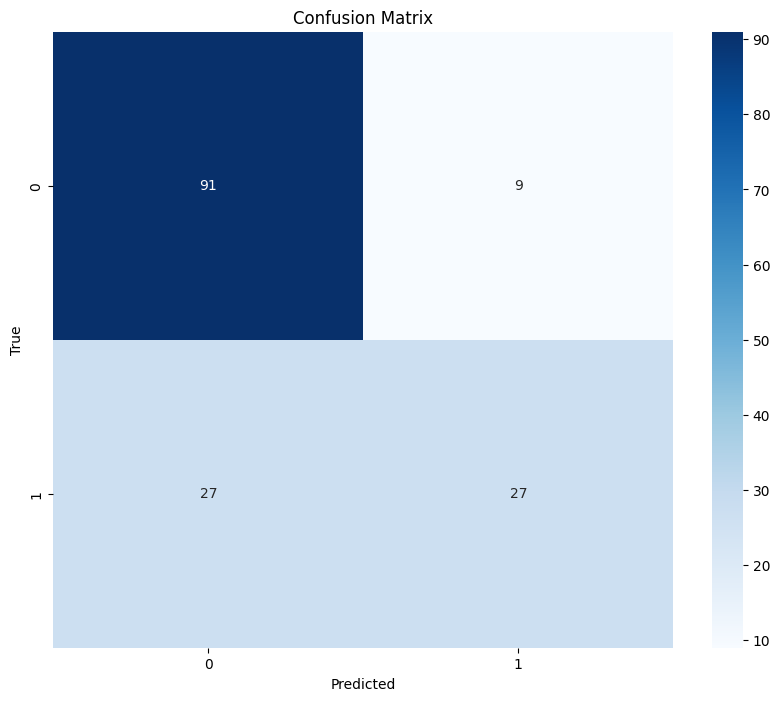

Accuracy: 0.7532467532467533
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81       100
         1.0       0.65      0.63      0.64        54

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



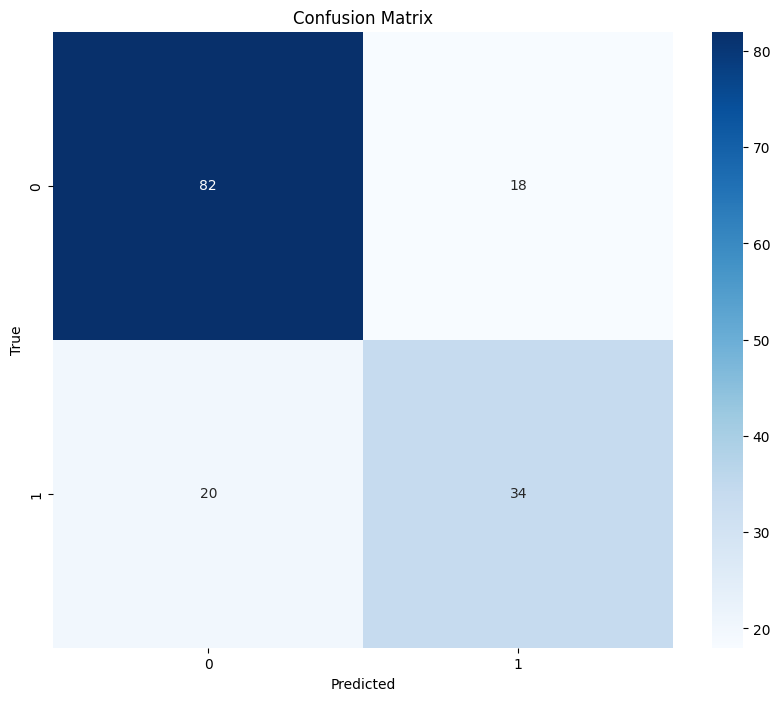

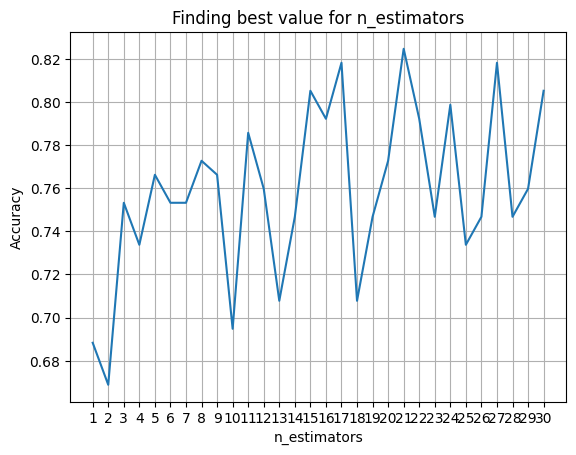

Highest value:  0.8246753246753247
              precision    recall  f1-score   support

         0.0       0.80      0.94      0.86       100
         1.0       0.83      0.56      0.67        54

    accuracy                           0.81       154
   macro avg       0.81      0.75      0.76       154
weighted avg       0.81      0.81      0.79       154



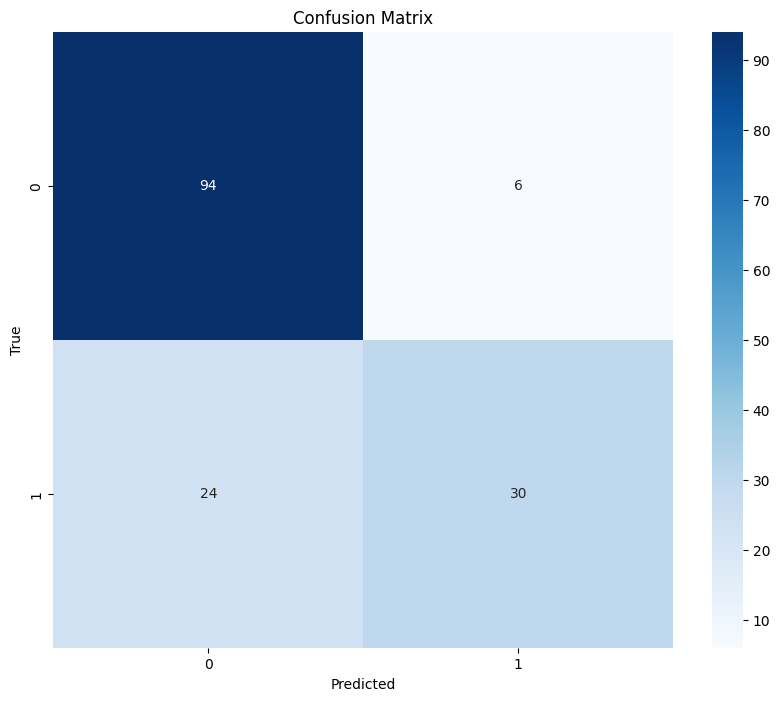

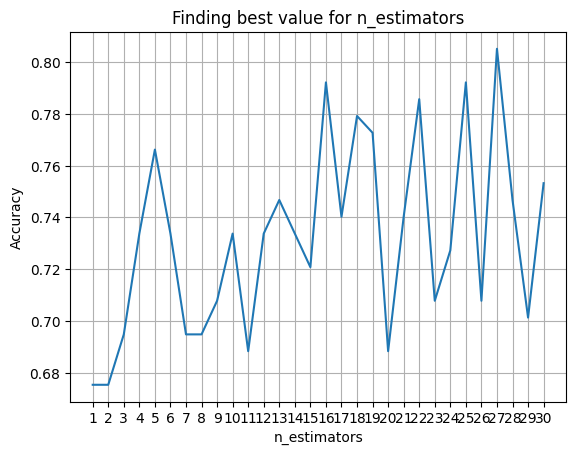

Highest value:  0.8051948051948052
              precision    recall  f1-score   support

         0.0       0.77      0.88      0.82       100
         1.0       0.70      0.52      0.60        54

    accuracy                           0.75       154
   macro avg       0.74      0.70      0.71       154
weighted avg       0.75      0.75      0.74       154



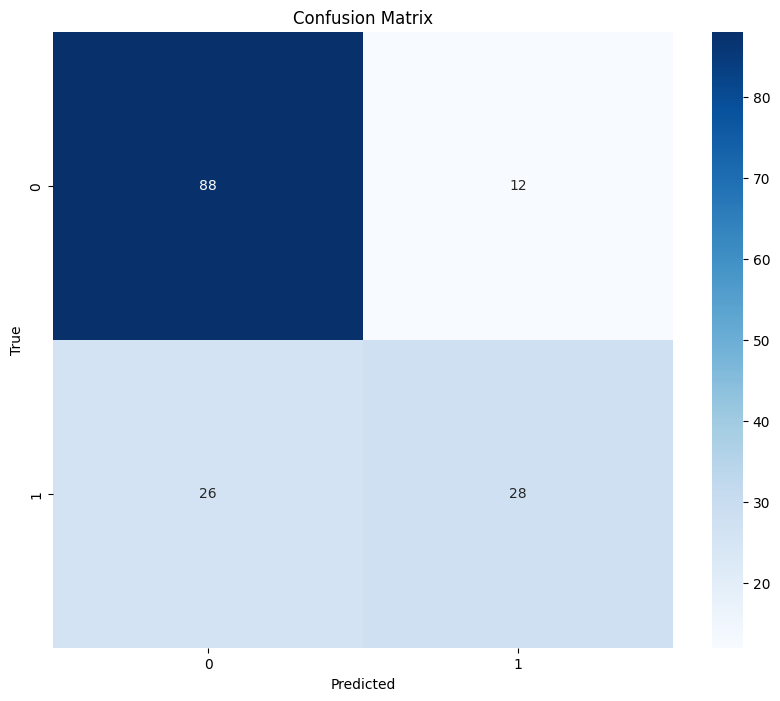

Accuracy: 0.7727272727272727
              precision    recall  f1-score   support

         0.0       0.80      0.87      0.83       100
         1.0       0.71      0.59      0.65        54

    accuracy                           0.77       154
   macro avg       0.75      0.73      0.74       154
weighted avg       0.77      0.77      0.77       154



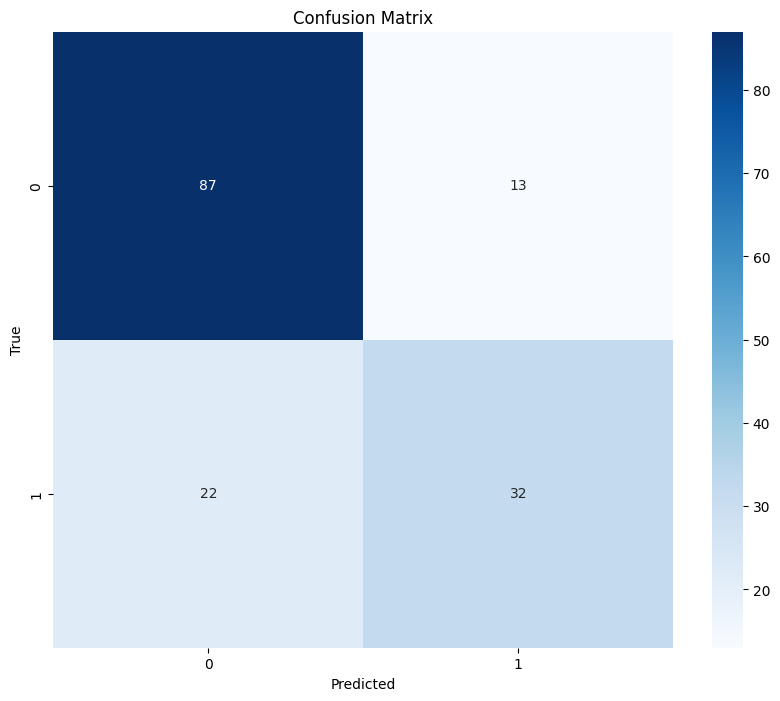

Accuracy: 0.7597402597402597
              precision    recall  f1-score   support

         0.0       0.79      0.86      0.82       100
         1.0       0.69      0.57      0.63        54

    accuracy                           0.76       154
   macro avg       0.74      0.72      0.72       154
weighted avg       0.75      0.76      0.75       154



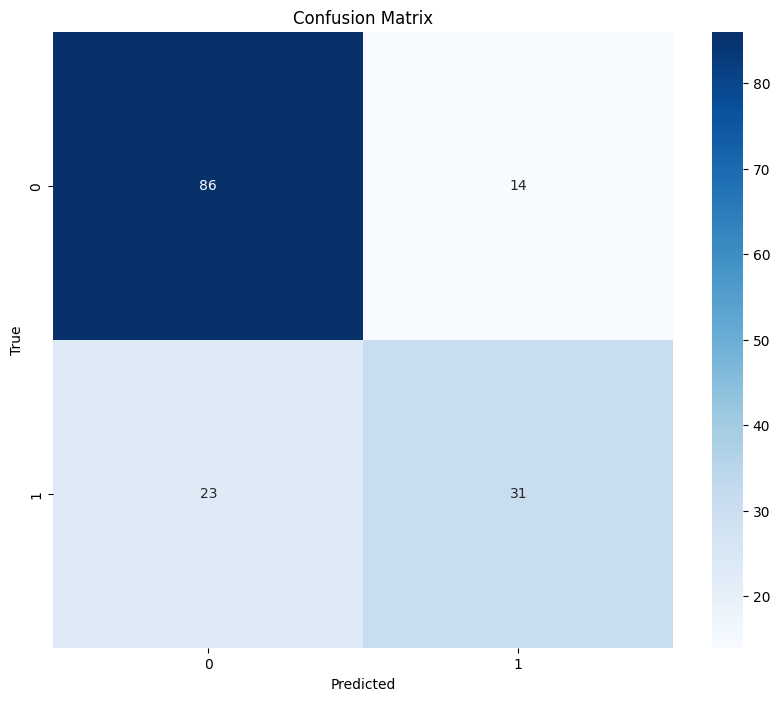

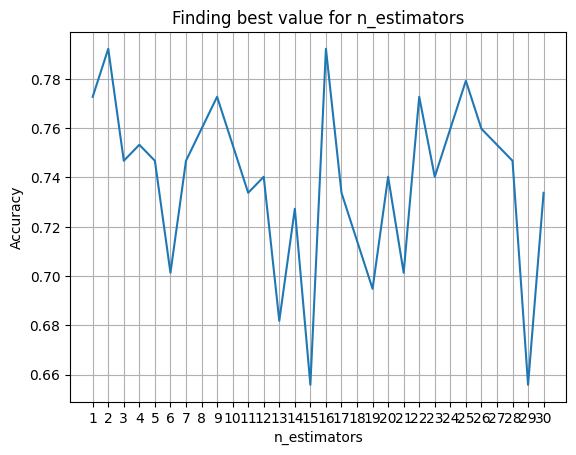

Highest value:  0.7922077922077922
              precision    recall  f1-score   support

         0.0       0.79      0.81      0.80       100
         1.0       0.63      0.59      0.61        54

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



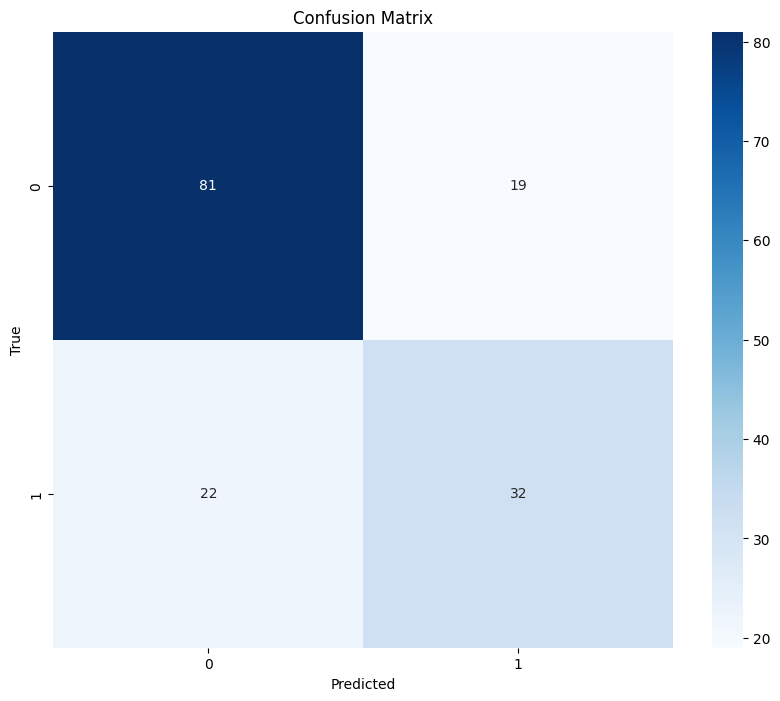

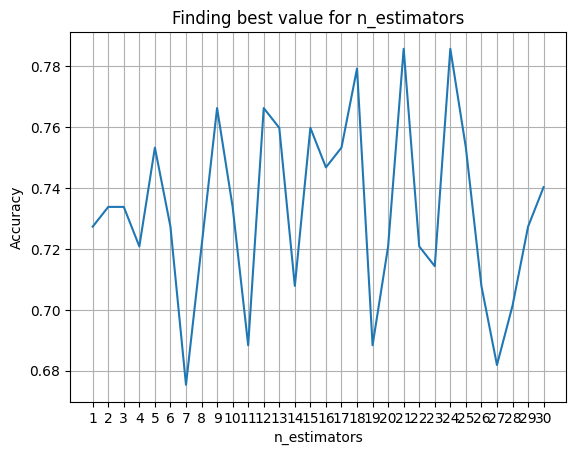

Highest value:  0.7857142857142857
              precision    recall  f1-score   support

         0.0       0.80      0.80      0.80       100
         1.0       0.63      0.63      0.63        54

    accuracy                           0.74       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.74      0.74      0.74       154



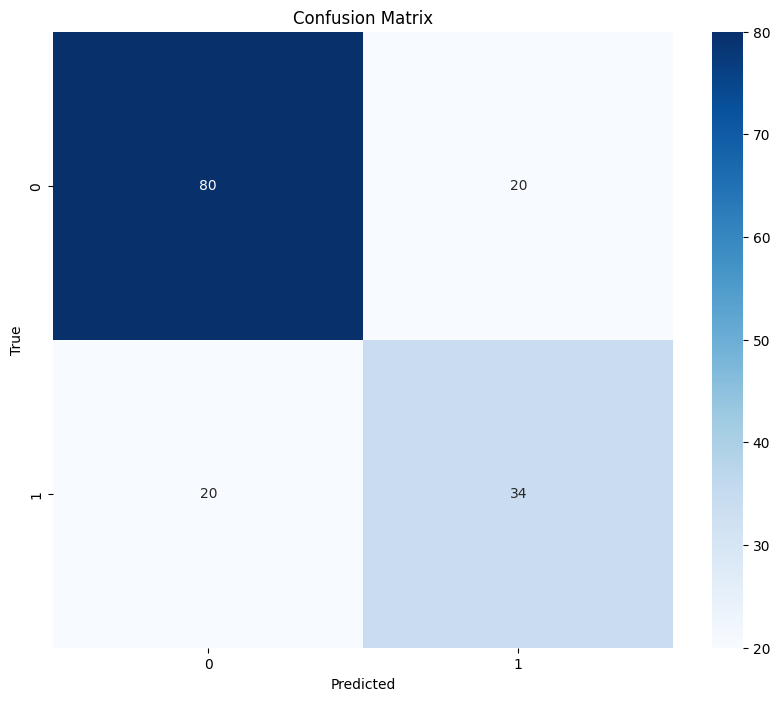

Accuracy: 0.8181818181818182
              precision    recall  f1-score   support

         0.0       0.82      0.93      0.87       100
         1.0       0.82      0.61      0.70        54

    accuracy                           0.82       154
   macro avg       0.82      0.77      0.79       154
weighted avg       0.82      0.82      0.81       154



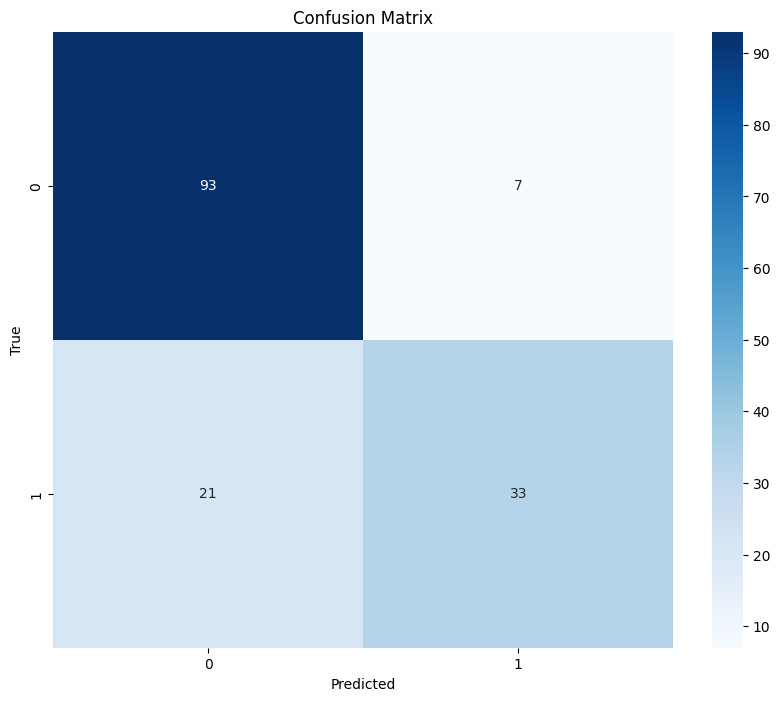

In [175]:
if __name__=='__main__':
    svm_without_pca(X,Y,C=1,kernel='linear',dataset=dataset_new)
    print('\n')
    svm_with_pca(X,Y,C=1,kernel='linear',n_components=2,dataset=dataset_new)
    print('\n')
    knn_without_pca(X,Y,dataset=dataset_new)
    print('\n')
    knn_with_pca(X,Y,n_components=2,dataset=dataset_new)
    print('\n')
    gnb_without_pca(X,Y,dataset=dataset_new)
    print('\n')
    gnb_with_pca(X,Y,n_components=2,dataset=dataset_new)
    print('\n')
    random_forest_without_pca(X,Y,dataset=dataset_new)
    print('\n')
    random_forest_with_pca(X,Y,n_components=2,dataset=dataset_new)
    print('\n')
    logistic_regression(X,Y,dataset=dataset_new)

## Concluzii finale